# Задания для самостоятельного решения

In [41]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt  #Пакет для построяния графиков и прочего
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [42]:
np.random.seed(11)
A1=stats.norm.rvs(scale=30,loc=11,size=100)
B1=A1+stats.norm.rvs(scale=54,loc=11,size=100)


In [43]:
mannwhitneyu(A1, B1)

MannwhitneyuResult(statistic=4343.0, pvalue=0.054347680446611354)

Выводы: так как выборки не зависимые, решено применить тест Майнавитни. Гипотеза H0 - эффект у препаратов отсутствует, то есть различий между выборками нет. Так как pvalue > 5%, мы не можем отвергунть данную гепотизу.

#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [44]:
np.random.seed(11)
A2=stats.norm.rvs(scale=30,loc=11,size=100)
B2=A2+stats.norm.rvs(scale=54,loc=11,size=100)


In [45]:
wilcoxon(A2, B2)

WilcoxonResult(statistic=1930.0, pvalue=0.04077572901549266)

Выборки зависимые, в связи с чем применям тест Вилксона. Гипотеза H0 - эффект у препаратов отсутствует, то есть различий между выборками нет. Pvalue < 5%, отвергаем нулевую гипотезу. 

#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 


water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [46]:
from scipy.stats import f_oneway

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [47]:
stats.f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

p value существенно ниже 5%, то есть мы можем отклонить нулевую гипотезу о том, что выборки имеют одинаковое распределение. То есть существует разница, чем поливать огурцы.

In [48]:
stats.f_oneway(nutri, mineral)

F_onewayResult(statistic=18.128724672228838, pvalue=0.0001213673340124552)

Сопоставляя результаты только двух выборок (полив удобрением и минералкой) видим, что pvalue < 5%, что так же говорит о различных результатах данных выборок.

# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>
 

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=400></p>


# Данные A/B тестирования

In [49]:
data = pd.read_csv('cookie_cats.csv') 
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

# Задание: провести анализ данных и сделать выводы о месте установки ворот. 
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. 

In [50]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


После группировки видно, что все пользователи поделены примерно по провну.

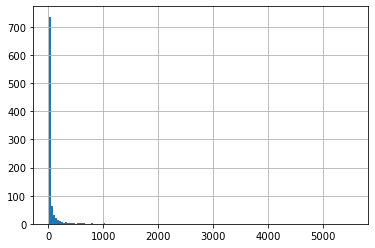

In [51]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=150)  # попробуйте поварировать bins=150

Из построенного графика видно, что распределение является нормальным

Text(0.5, 0, '№ Игрового раунда')

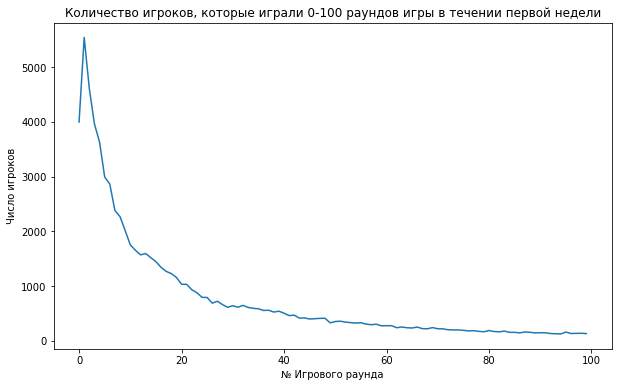

In [52]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("Количество игроков, которые играли 0-100 раундов игры в течении первой недели")
ax.set_ylabel("Число игроков")
ax.set_xlabel('№ Игрового раунда')

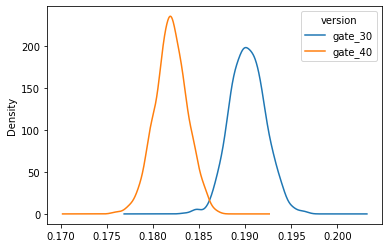

In [54]:
# Создание списка для AB-теста
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_7
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Если я правильно прочитал код: берем выборку из всего массива, группируем на две подвыборки в зависимости от версии и находим долю пользователей, вернувшихся после 7 дней игры. 
Из графика видно, что среднее количество вернувшихся игроков в версии 30 выше.  

In [18]:
boot_1d

version,gate_30,gate_40
retention_1,0.449577,0.442808
retention_1,0.446253,0.442633
retention_1,0.450313,0.444127
retention_1,0.443865,0.444724
retention_1,0.446415,0.438664
...,...,...
retention_1,0.445385,0.434991
retention_1,0.447860,0.439028
retention_1,0.447491,0.444559
retention_1,0.445552,0.443376


In [55]:
data2 = data.groupby('version').sum()
data2

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034.0,8502.0
gate_40,227857702576,2333530,20119.0,8279.0


#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

Нулевая гипотеза состит в том, что из - за сдвига ворот эффект отсутствует.

In [56]:
#from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
# from scipy.stats import mannwhitneyu
# import scipy.stats as stats
gate_30 = boot_1d['gate_30']
gate_40 = boot_1d['gate_40']

s,p  = wilcoxon(gate_30, gate_40)
alpha = 0.05 # уровнь занчимости
if p < alpha:
    print('Отвергаем нулвевую гипотезу, эффект от сдвига ворот есть')
else: print('Не отвергаем нулевую гипотезу')

Отвергаем нулвевую гипотезу, эффект от сдвига ворот есть
